<a href="https://colab.research.google.com/github/janaeam/food-sales-predictions/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting to Know My Data



In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/Project 1/sales_predictions.csv'
sales = pd.read_csv(filename)

In [4]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### EDA

In [5]:
# Are the dtypes consistent with the presumed column category

sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# Which columns have missing values?

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Weight and Outlet_Size columns are both missing data

I will explore further below

# Checking each column for unique value counts

In [7]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
sales.loc[ : , 'Item_Fat_Content'].replace( {'LF' : 'Low Fat',
                                            'low fat' : 'Low Fat',
                                             'reg' : 'Regular'}, inplace=True)

In [9]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
sales['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCF42     9
FDX04     9
NCL31     9
         ..
FDQ60     1
FDC23     1
FDK57     1
DRF48     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
sales['Item_MRP'].value_counts()

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

In [12]:
sales['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [13]:
sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
sales['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [15]:
sales['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [16]:
sales['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [17]:
sales['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [18]:
sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Columns to Drop

I will drop only the "Item_Visibility" column for now. Initially I thought this column would prove to be useful in predicting sales baased on the visibility of each individual product, however, since the lowest visibility products, including those with zero visibility, account for the majority of the dataset (77%). There is no need to qualify this coulumn's data values beecause it is irrelevent. 
Also, the products with the highest visibiilty, both above .3 and .2, account for only 1.4%, further proving this column's irrelevance.

#### It is my belief that we can assume the product's visibility value has very little to do with it's sale value.

In [20]:
vis_filter = sales['Item_Visibility'].count()
vis_filter1 = (sales['Item_Visibility'] >= .0) & (sales['Item_Visibility'] < .1)
vis_filter2 = (sales['Item_Visibility'] >= .1) & (sales['Item_Visibility'] < .2)
vis_filter3 = (sales['Item_Visibility'] >= .2) & (sales['Item_Visibility'] < .3)
vis_filter4 = sales['Item_Visibility'] >= .3

vis_count1 = sales.loc[vis_filter1, 'Item_Visibility'].count()
vis_count2 = sales.loc[vis_filter2, 'Item_Visibility'].count()
vis_count3 = sales.loc[vis_filter3, 'Item_Visibility'].count()
vis_count4 = sales.loc[vis_filter4, 'Item_Visibility'].count()

print(vis_count1)
print(round(vis_count1/vis_filter, 2))
print(vis_count2)
print(round(vis_count2/vis_filter, 2))
print(vis_count3)
print(round(vis_count3/vis_filter, 3))
print(vis_count4)
print(round(vis_count4/vis_filter, 4))

6593
0.77
1796
0.21
122
0.014
12
0.0014


In [21]:
sales.drop(columns = 'Item_Visibility', inplace = True)

## Exploring the relevance of missing data in the Item_Weight and Outlet_Size columns



---

----- First... look at Outlet_Size column

In [22]:
outlet_missing = sales['Outlet_Size'].isna()
sales.loc[outlet_missing, :].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [23]:
sales[outlet_missing].shape

(2410, 11)

In [24]:
# Checking value counts with the outlet_missing filter on the Outlet_Identifier column to see how 
# the missing Outlet_Size values compare to the Outlet_Identifier value counts already checked above

sales.loc[outlet_missing, 'Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [25]:
# Checking how the Outlet_Type and Outlet_Identifier columns compare together with the missing
# values from the Outlet_Size column

sales.loc[outlet_missing, ['Outlet_Identifier', 'Outlet_Type', 'Outlet_Establishment_Year', 'Outlet_Location_Type']].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Establishment_Year  Outlet_Location_Type
OUT045             Supermarket Type1  2002                       Tier 2                  929
OUT017             Supermarket Type1  2007                       Tier 2                  926
OUT010             Grocery Store      1998                       Tier 3                  555
dtype: int64

#### In the above cell where the value counts for the Outlet_Type column "Supermarket Type1" accounted for 5577 cells I will check to see if all the other Outlet_Type rows with "Supermarket Type1" contain a consistent Outlet_Size as this will allow me to see what the Outlet_Size values should be.

In [26]:
# Checking value counts with the outlet_missing filter on the Outlet_Type column to see how 
# the missing Outlet_Size values compare to the Outlet_Type value counts already checked above

print(sales.loc[outlet_missing, 'Outlet_Type'].value_counts())
print(sales.loc[outlet_missing, 'Outlet_Establishment_Year'].value_counts()) #All Years correspond with missing values
print(sales.loc[outlet_missing, 'Outlet_Location_Type'].value_counts()) #Tier 3 = 555 (same as Grocery and OUT010 and 1998)
print(sales.loc[outlet_missing, 'Item_Outlet_Sales'].value_counts().sort_values())
print(sales.loc[outlet_missing, 'Item_Outlet_Sales'].max())

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64
2002    929
2007    926
1998    555
Name: Outlet_Establishment_Year, dtype: int64
Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64
95.8752      1
237.6906     1
8760.5964    1
2366.9190    1
2646.5550    1
            ..
2302.3364    5
1230.3984    6
1225.0720    6
958.7520     6
838.9080     7
Name: Item_Outlet_Sales, Length: 1627, dtype: int64
9664.7528


In [27]:
# there's no clear correlation between location tier and store size
tier1_filter = sales['Outlet_Location_Type'] == 'Tier 1'
tier2_filter = sales['Outlet_Location_Type'] == 'Tier 2'
tier3_filter = sales['Outlet_Location_Type'] == 'Tier 3'

print(sales.loc[tier1_filter, 'Outlet_Size'].value_counts())
print(sales.loc[tier2_filter, 'Outlet_Size'].value_counts())
print(sales.loc[tier3_filter, 'Outlet_Size'].value_counts())

Small     1458
Medium     930
Name: Outlet_Size, dtype: int64
Small    930
Name: Outlet_Size, dtype: int64
Medium    1863
High       932
Name: Outlet_Size, dtype: int64


In [28]:
# These 3 years only correlate with the missing values ... no evidence of store size imputation

year98est_filter = sales['Outlet_Establishment_Year'] == 1998
year02est_filter = sales['Outlet_Establishment_Year'] == 2002
year07est_filter = sales['Outlet_Establishment_Year'] == 2007

print(sales.loc[year98est_filter, 'Outlet_Size'].value_counts())
print(sales.loc[year02est_filter, 'Outlet_Size'].value_counts())
print(sales.loc[year07est_filter, 'Outlet_Size'].value_counts())

Series([], Name: Outlet_Size, dtype: int64)
Series([], Name: Outlet_Size, dtype: int64)
Series([], Name: Outlet_Size, dtype: int64)


In [29]:
# Grocery Store is only listed as Small. All other rows that contain 'Grocery Store' show NAN for the Outlet Size 

sup1Type_filter = sales['Outlet_Type'] == 'Supermarket Type1'
grocType_filter = sales['Outlet_Type'] == 'Grocery Store'

print(sales.loc[sup1Type_filter, 'Outlet_Size'].value_counts())
print(sales.loc[grocType_filter, 'Outlet_Size'].value_counts())

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64
Small    528
Name: Outlet_Size, dtype: int64


In [30]:
# All rows containing OUT010, 1998 and Grocery Store occupy the same 555 rows.
# These 555 rows are missing a value for Outlet Size and are all in location Tier 3.
# I believe that since the only other mention of Grocery is small and that Tier 3 is 

sales.loc[outlet_missing & tier3_filter, [ 'Outlet_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year']]

,Outlet_Type,Outlet_Identifier,Outlet_Establishment_Year
3,Grocery Store,OUT010,1998
28,Grocery Store,OUT010,1998
30,Grocery Store,OUT010,1998
45,Grocery Store,OUT010,1998
65,Grocery Store,OUT010,1998
...,...,...,...
8400,Grocery Store,OUT010,1998
8432,Grocery Store,OUT010,1998
8473,Grocery Store,OUT010,1998
8486,Grocery Store,OUT010,1998


In [31]:
# Without further exploring the Item Sales agaisnt other information there is no clear correlation
# between the item sales and Outlet Size

size = sales['Outlet_Size'] == 'Small'

itSales1_filter = sales['Item_Outlet_Sales'] <= 100
itSales2_filter = (sales['Item_Outlet_Sales'] >= 101) & (sales['Item_Outlet_Sales'] <= 200)
itSales3_filter = (sales['Item_Outlet_Sales'] >= 201) & (sales['Item_Outlet_Sales'] <= 300)
itSales4_filter = (sales['Item_Outlet_Sales'] >= 301) & (sales['Item_Outlet_Sales'] <= 400)
itSales5_filter = (sales['Item_Outlet_Sales'] >= 401) & (sales['Item_Outlet_Sales'] <= 500)
itSales6_filter = (sales['Item_Outlet_Sales'] >= 501) & (sales['Item_Outlet_Sales'] <= 600)
itSales7_filter = (sales['Item_Outlet_Sales'] >= 601) & (sales['Item_Outlet_Sales'] <= 700)
itSales8_filter = (sales['Item_Outlet_Sales'] >= 701) & (sales['Item_Outlet_Sales'] <= 800)
itSales9_filter = (sales['Item_Outlet_Sales'] >= 801) & (sales['Item_Outlet_Sales'] <= 900)
itSales10_filter = sales['Item_Outlet_Sales'] >= 901

print(sales.loc[itSales1_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales1_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales2_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales2_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales3_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales3_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales4_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales4_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales5_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales5_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales6_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales6_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales7_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales7_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales8_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales8_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales9_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales9_filter & outlet_missing, 'Item_Outlet_Sales'].count())
print(sales.loc[itSales10_filter, 'Outlet_Size'].value_counts())
print(sales.loc[itSales10_filter & outlet_missing, 'Item_Outlet_Sales'].count())

Small     54
Medium     3
High       1
Name: Outlet_Size, dtype: int64
66
Small     148
Medium     17
High       10
Name: Outlet_Size, dtype: int64
179
Small     107
Medium     27
High       17
Name: Outlet_Size, dtype: int64
104
Small     106
Medium     37
High       30
Name: Outlet_Size, dtype: int64
96
Small     95
Medium    52
High      15
Name: Outlet_Size, dtype: int64
92
Small     84
Medium    69
High      25
Name: Outlet_Size, dtype: int64
98
Small     70
Medium    67
High      36
Name: Outlet_Size, dtype: int64
70
Small     83
Medium    71
High      28
Name: Outlet_Size, dtype: int64
93
Medium    69
Small     67
High      21
Name: Outlet_Size, dtype: int64
76
Medium    2380
Small     1571
High       749
Name: Outlet_Size, dtype: int64
1533


In [32]:
# Further proof that Grocery Story is either listed as Small in the Outlet Size column or Nan
# There are 555 rows containing Grocery and no specification of Outlet Size
# There are 528 rows containing Grocery and Small Outlet Size

print(sales.loc[grocType_filter, 'Outlet_Type'].value_counts())
print(sales[grocType_filter & ~outlet_missing].count())

Grocery Store    1083
Name: Outlet_Type, dtype: int64
Item_Identifier              528
Item_Weight                    0
Item_Fat_Content             528
Item_Type                    528
Item_MRP                     528
Outlet_Identifier            528
Outlet_Establishment_Year    528
Outlet_Size                  528
Outlet_Location_Type         528
Outlet_Type                  528
Item_Outlet_Sales            528
dtype: int64


In [33]:
sales[grocType_filter & outlet_missing].count()

Item_Identifier              555
Item_Weight                  555
Item_Fat_Content             555
Item_Type                    555
Item_MRP                     555
Outlet_Identifier            555
Outlet_Establishment_Year    555
Outlet_Size                    0
Outlet_Location_Type         555
Outlet_Type                  555
Item_Outlet_Sales            555
dtype: int64

In [34]:
# Further proving that these Outlet Idenifier numbers are missing from the Outlet Size column
# this not help impute size for these outlet stores

OUT045_filter = sales['Outlet_Identifier'] == 'OUT045'
OUT017_filter = sales['Outlet_Identifier'] == 'OUT017'
OUT010_filter = sales['Outlet_Identifier'] == 'OUT010'

sales.loc[OUT010_filter | OUT017_filter | OUT045_filter, 'Outlet_Size'].count()

0



---

---- Second... Look at Item_Weight column


In [35]:
weight_missing = sales['Item_Weight'].isna()
sales.loc[weight_missing, :].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [36]:
sales[weight_missing].shape

(1463, 11)

In [37]:
sales['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [38]:
sales.loc[weight_missing, 'Item_Type'].value_counts()

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64

In [39]:
sales.loc[weight_missing, :].groupby(['Item_Type','Item_Fat_Content'])[['Item_Weight','Item_MRP']].count()


Item_Weight  Item_MRP
Item_Type             Item_Fat_Content                       
Baking Goods          Low Fat                     0        67
                      Regular                     0        45
Breads                Low Fat                     0        27
                      Regular                     0        20
Breakfast             Low Fat                     0         7
                      Regular                     0        14
Canned                Low Fat                     0        55
                      Regular                     0        55
Dairy                 Low Fat                     0        64
                      Regular                     0        52
Frozen Foods          Low Fat                     0        75
                      Regular                     0        63
Fruits and Vegetables Low Fat                     0       112
                      Regular                     0       101
Hard Drinks           Low Fat                     0        31
Health and Hygiene    Low Fat                     0        90
Household             Low Fat                     0       151
Meat                  Low Fat                     0        38
                      Regular                     0        50
Others                Low Fat                     0        32
Seafood               Low Fat                     0         8
                      Regular                     0         5
Snack Foods           Low Fat                     0       127
                      Regular                     0        85
Soft Drinks           Low Fat                     0        59
                      Regular                     0        12
Starchy Foods         Low Fat                     0         8
                      Regular                     0        10

In [40]:
sales.loc[~weight_missing, :].groupby(['Item_Type','Item_Fat_Content'])[['Item_Weight','Item_MRP']].count()

Item_Weight  Item_MRP
Item_Type             Item_Fat_Content                       
Baking Goods          Low Fat                   262       262
                      Regular                   274       274
Breads                Low Fat                   113       113
                      Regular                    91        91
Breakfast             Low Fat                    34        34
                      Regular                    55        55
Canned                Low Fat                   286       286
                      Regular                   253       253
Dairy                 Low Fat                   354       354
                      Regular                   212       212
Frozen Foods          Low Fat                   375       375
                      Regular                   343       343
Fruits and Vegetables Low Fat                   518       518
                      Regular                   501       501
Hard Drinks           Low Fat                   183       183
Health and Hygiene    Low Fat                   430       430
Household             Low Fat                   759       759
Meat                  Low Fat                   132       132
                      Regular                   205       205
Others                Low Fat                   137       137
Seafood               Low Fat                    29        29
                      Regular                    22        22
Snack Foods           Low Fat                   565       565
                      Regular                   423       423
Soft Drinks           Low Fat                   315       315
                      Regular                    59        59
Starchy Foods         Low Fat                    74        74
                      Regular                    56        56

In [41]:
sales.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [42]:
sales.groupby(['Item_Type'])['Item_Weight'].max()

Item_Type
Baking Goods             20.85
Breads                   20.85
Breakfast                21.10
Canned                   21.35
Dairy                    20.70
Frozen Foods             20.85
Fruits and Vegetables    21.35
Hard Drinks              19.70
Health and Hygiene       21.25
Household                21.25
Meat                     21.25
Others                   20.50
Seafood                  20.75
Snack Foods              21.25
Soft Drinks              20.75
Starchy Foods            21.20
Name: Item_Weight, dtype: float64

In [43]:
print(sales.groupby(['Item_Type'])['Item_Weight'].min())

Item_Type
Baking Goods             4.880
Breads                   4.635
Breakfast                6.425
Canned                   4.615
Dairy                    4.805
Frozen Foods             4.555
Fruits and Vegetables    5.460
Hard Drinks              4.610
Health and Hygiene       5.175
Household                5.030
Meat                     5.150
Others                   5.500
Seafood                  5.365
Snack Foods              5.095
Soft Drinks              4.590
Starchy Foods            6.695
Name: Item_Weight, dtype: float64


In [44]:
sales.loc[weight_missing, 'Item_Identifier'].count()

1463

In [45]:
sales.loc[weight_missing, 'Item_Identifier'].nunique()

1142

In [46]:
sales.groupby(['Item_Type', 'Item_Identifier'])['Item_Weight'].count()

Item_Type      Item_Identifier
Baking Goods   FDA11              4
               FDA23              5
               FDA35              3
               FDA36              2
               FDA47              5
                                 ..
Starchy Foods  FDG59              5
               FDH35              5
               FDH47              6
               FDI35              3
               FDZ34              3
Name: Item_Weight, Length: 1559, dtype: int64

In [47]:
# Found 2 of the NAN values that share a Type ID with 8 others. Easy to know
# these weights are specific to this Type ID

typeID_FDW13 = sales['Item_Identifier'] == 'FDW13'

sales['Item_Weight'][typeID_FDW13].fillna(8.5)

256     8.5
1141    8.5
2190    8.5
3928    8.5
3978    8.5
6499    8.5
6587    8.5
7029    8.5
8025    8.5
8032    8.5
Name: Item_Weight, dtype: float64

I have no idea how to make these values apply. I tried renaming the dataframe, but it not work. I also tried creating a function, but I obviously still have no idea how to work with those. Either way, I will be moving on from this strategy and filling in all missing values by either creating another category or by imputing the "best fit" for that column.

In [48]:
sales['Outlet_Size'].fillna('Not Specified', inplace=True)

In [49]:
sales['Outlet_Size'].value_counts()

Medium           2793
Not Specified    2410
Small            2388
High              932
Name: Outlet_Size, dtype: int64

In [50]:
sales['Item_Weight'].fillna(0.000, inplace=True)

In [51]:
sales['Item_Weight'].value_counts()

0.000     1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
5.675        2
9.420        1
6.520        1
7.685        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [52]:
sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Removing Unwanted Data Observations

In [53]:
# Checking for duplicates

sales.duplicated().any()

False

# Part 3

In [54]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


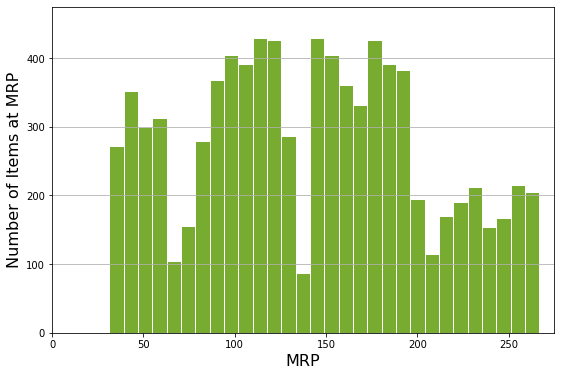

In [55]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')
plt.figure(figsize = (9,6))
sales['Item_MRP'].hist(bins = 30, color='#77AC30', edgecolor='white');
plt.xlim(left = 0, right = 275)
plt.ylim(top=475)
plt.xlabel('MRP', fontsize = 16)
plt.ylabel('Number of Items at MRP', fontsize = 16)
plt.grid(axis = 'x')

In [56]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [57]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [58]:
sales['Outlet_Size'].value_counts()

Medium           2793
Not Specified    2410
Small            2388
High              932
Name: Outlet_Size, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


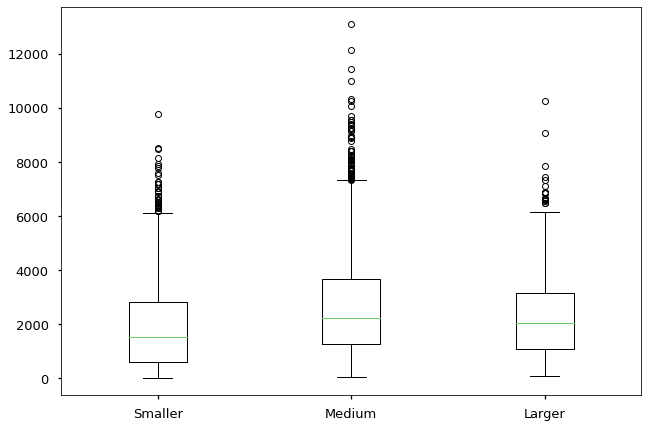

In [59]:
plt.style.use('seaborn-talk')
small = sales.loc[sales['Outlet_Size']=='Small', 'Item_Outlet_Sales'].values
medium = sales.loc[sales['Outlet_Size']=='Medium', 'Item_Outlet_Sales'].values
high = sales.loc[sales['Outlet_Size']=='High', 'Item_Outlet_Sales'].values
plt.boxplot([small, medium, high], labels=['Smaller', 'Medium', 'Larger']);

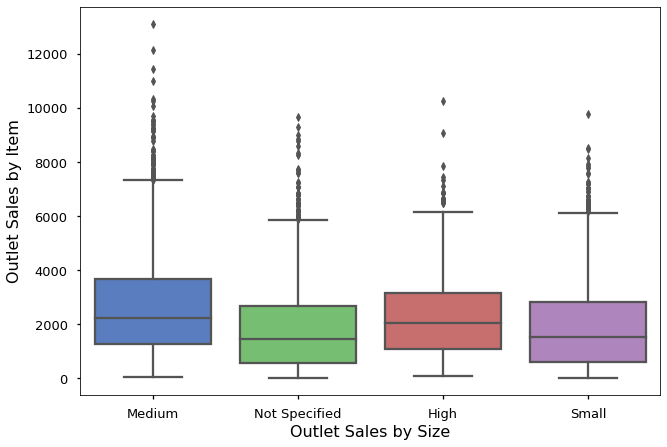

In [60]:
import seaborn as sns
sns.boxplot(x= 'Outlet_Size', y= 'Item_Outlet_Sales',  data= sales)
plt.ylabel('Outlet Sales by Item', fontsize=16)
plt.xlabel('Outlet Sales by Size', fontsize = 16);

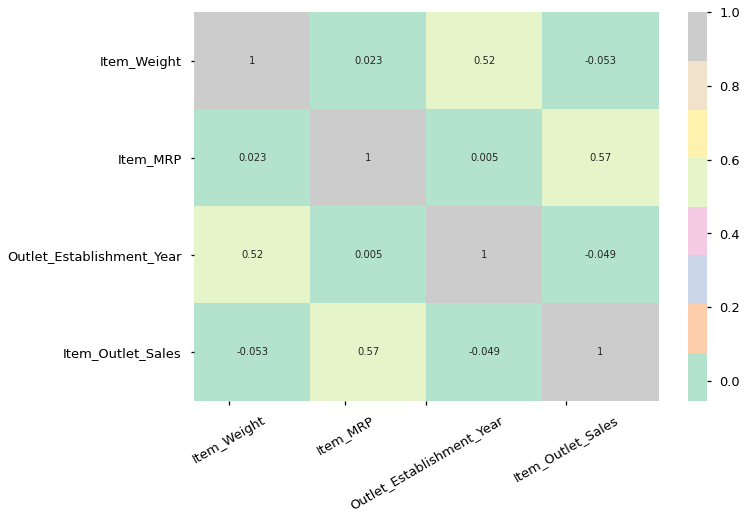

In [61]:
# The only true correlation is between the item MRP and the item sales. Makes sense
corr = sales.corr()

sns.heatmap(corr, cmap= 'Pastel2', annot =True);
plt.xticks(np.array([0.3,1.3,2,3.2]), rotation=30);

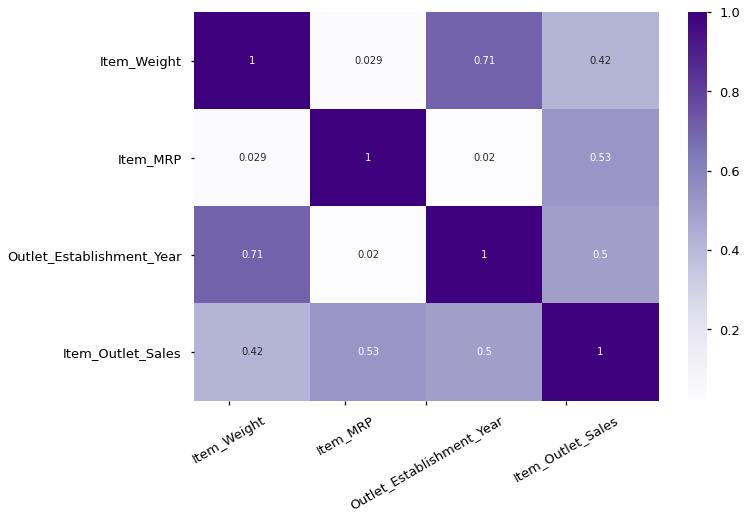

In [62]:
# The next 3 heat maps will be based on the size of the Outlet
# filtering will be done in order from smallest sq footage to highest

sm_filter = sales.loc[sales['Outlet_Size']=='Small', :]
sm_filter = sm_filter.corr()

sns.heatmap(sm_filter, cmap = 'Purples', annot=True);
plt.xticks(np.array([0.3,1.3,2,3.2]), rotation=30);

([<matplotlib.axis.XTick at 0x7efcc1d01a90>,
 [Text(0.5, 0, 'Item Weight'),
  Text(1.5, 0, 'Item MRP'),
  Text(2.5, 0, 'Outlet Establishment Year'),
  Text(3.5, 0, 'Item Outlet Sales')])

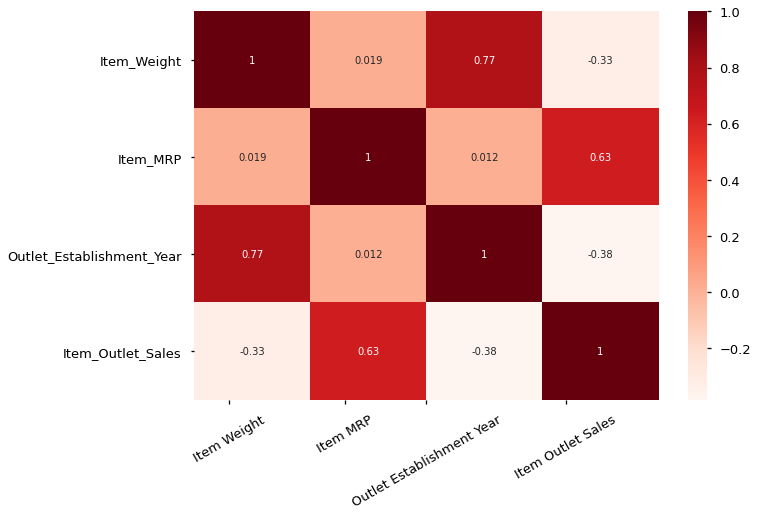

In [63]:
md_filter = sales.loc[sales['Outlet_Size']=='Medium', :]
md_filter = md_filter.corr()

sns.heatmap(md_filter, cmap = 'Reds', annot=True);
plt.xticks([0.3,1.3,2,3.2], ['Item Weight', 'Item MRP', 'Outlet Establishment Year', 'Item Outlet Sales'], rotation=30)

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

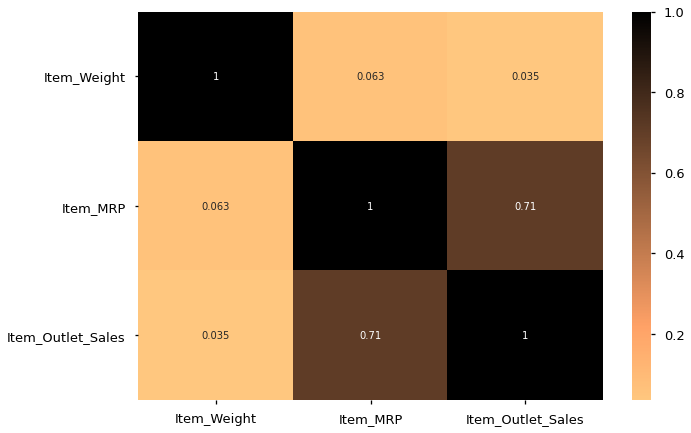

In [64]:
lg_filter = sales.loc[sales['Outlet_Size']=='High', ['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']]
lg_filter = lg_filter.corr()

sns.heatmap(lg_filter, cmap = 'copper_r', annot=True);
plt.yticks(rotation=360)

# Part 4

### Creating a bar chart for Location-based Sales

In [65]:
spd = pd.read_csv(filename)
meh3 = spd['Outlet_Type'] == 'Supermarket Type3'
spd.loc[meh3, 'Outlet_Identifier'].value_counts()

OUT027    935
Name: Outlet_Identifier, dtype: int64

In [242]:
tier = spd['Outlet_Location_Type'] == 'Tier 1'
spd.loc[tier, ['Outlet_Type', 'Outlet_Identifier']].value_counts()

Outlet_Type        Outlet_Identifier
Supermarket Type1  OUT049               930
                   OUT046               930
Grocery Store      OUT019               528
dtype: int64

In [66]:
spd['Outlet_Size'] = spd['Outlet_Size'].fillna('Unspecified')

In [67]:
tier_group = spd.groupby(['Outlet_Location_Type','Outlet_Size', 'Outlet_Type'])['Item_Outlet_Sales'].sum()
tier_group

Outlet_Location_Type  Outlet_Size  Outlet_Type      
Tier 1                Medium       Supermarket Type1    2.183970e+06
                      Small        Grocery Store        1.796941e+05
                                   Supermarket Type1    2.118395e+06
Tier 2                Small        Supermarket Type1    2.268123e+06
                      Unspecified  Supermarket Type1    4.204191e+06
Tier 3                High         Supermarket Type1    2.142664e+06
                      Medium       Supermarket Type2    1.851823e+06
                                   Supermarket Type3    3.453926e+06
                      Unspecified  Grocery Store        1.883402e+05
Name: Item_Outlet_Sales, dtype: float64

In [68]:
spd.pivot_table(values='Item_Outlet_Sales',
                 columns='Outlet_Location_Type',aggfunc=lambda x:x.sum())

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Outlet_Sales,4482059.072,6.472314e+06,7636752.632


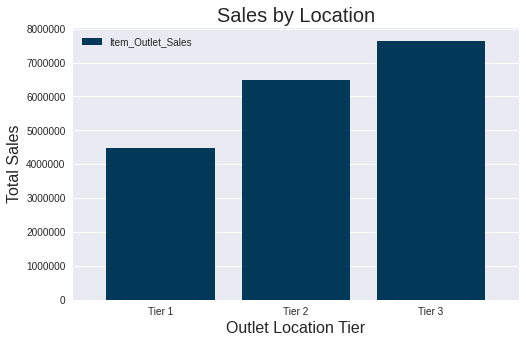

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
Sales_byLoc = spd.pivot_table(index='Outlet_Location_Type',
                 values='Item_Outlet_Sales',aggfunc=lambda x:x.sum())
Sales_byLoc.plot(kind='bar',figsize=(8,5), colormap='PuBu_r', width=.8)
plt.xlabel('Outlet Location Tier', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.title('Sales by Location', fontsize=20)
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.ticklabel_format(style='Plain', axis='y')

In [70]:
sales['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [71]:
print('Tier 1 =' + str((round(2388/len(sales['Outlet_Location_Type']), 2))))
print('Tier 2 =' + str((round(2785/len(sales['Outlet_Location_Type']), 2))))
print('Tier 3 =' + str((round(3350/len(sales['Outlet_Location_Type']), 2))))

Tier 1 =0.28
Tier 2 =0.33
Tier 3 =0.39


In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [73]:
uniqueItems = sales.groupby(['Outlet_Establishment_Year'])['Outlet_Identifier'].nunique()

uniqueItems

Outlet_Establishment_Year
1985    2
1987    1
1997    1
1998    1
1999    1
2002    1
2004    1
2007    1
2009    1
Name: Outlet_Identifier, dtype: int64

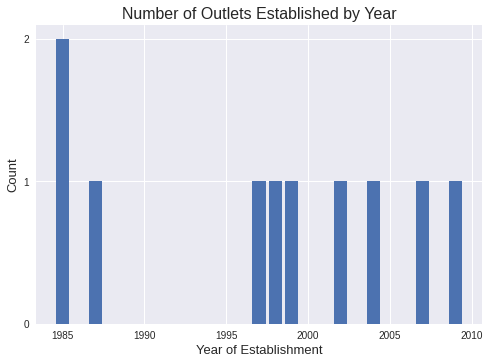

In [74]:
plt.bar(uniqueItems.index, uniqueItems.values)
plt.yticks(np.arange(3), [0, 1, 2])
plt.title('Number of Outlets Established by Year', fontsize = 16)
plt.ylabel('Count', fontsize= 13)
plt.xlabel('Year of Establishment', fontsize = 13);

In [75]:
itemsSold = sales.groupby(['Outlet_Establishment_Year', 'Outlet_Identifier'])['Item_Identifier'].nunique()

itemsSold

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT019               528
                           OUT027               935
1987                       OUT013               932
1997                       OUT046               930
1998                       OUT010               555
1999                       OUT049               930
2002                       OUT045               929
2004                       OUT035               930
2007                       OUT017               926
2009                       OUT018               928
Name: Item_Identifier, dtype: int64

In [76]:
soldbyOutlet = itemsSold.index.droplevel(level=0)

soldbyOutlet

Index(['OUT019', 'OUT027', 'OUT013', 'OUT046', 'OUT010', 'OUT049', 'OUT045',
       'OUT035', 'OUT017', 'OUT018'],
      dtype='object', name='Outlet_Identifier')

In [77]:
itemsSold.values

array([528, 935, 932, 930, 555, 930, 929, 930, 926, 928])

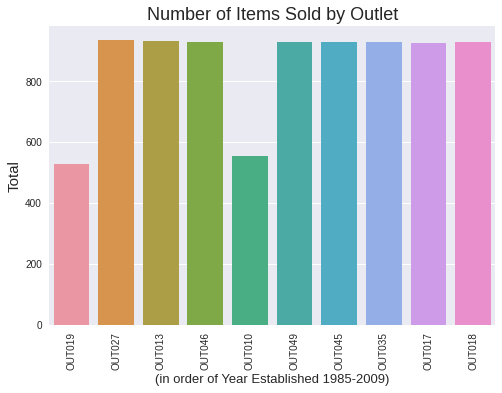

In [78]:
sns.barplot(x = soldbyOutlet, y = itemsSold.values)
plt.xticks(rotation= 90);
plt.title('Number of Items Sold by Outlet', fontsize = 18)
plt.xlabel('Outlet Identifier', fontsize = 15)
plt.xlabel('(in order of Year Established 1985-2009)', fontsize = 13)
plt.ylabel('Total', fontsize = 15);

In [79]:
salesbyLocation = sales.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

salesbyLocation

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

# Part 5

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [81]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [82]:
sales['Outlet_Size'].value_counts()

Medium           2793
Not Specified    2410
Small            2388
High              932
Name: Outlet_Size, dtype: int64

In [83]:
# Outlet_Size is ordinal so I am replacing the store sizes with numbered columns.
# For now I am keeping the Not Specified data as it's a substantial portion of this
# ths columns data. I don't want to rid of this column because I believe this column
# in terms of predicting individual item sales. However, it's possible the Outlet_Identifier
# is a sufficient replacement for the outlet size column.

mod_sales = sales
mod_sales['Outlet_Size'] = sales['Outlet_Size'].replace({'Not Specified' : 0,
                                                     'Small' : 1,
                                                     'Medium' : 2,
                                                     'High' : 3})
mod_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052


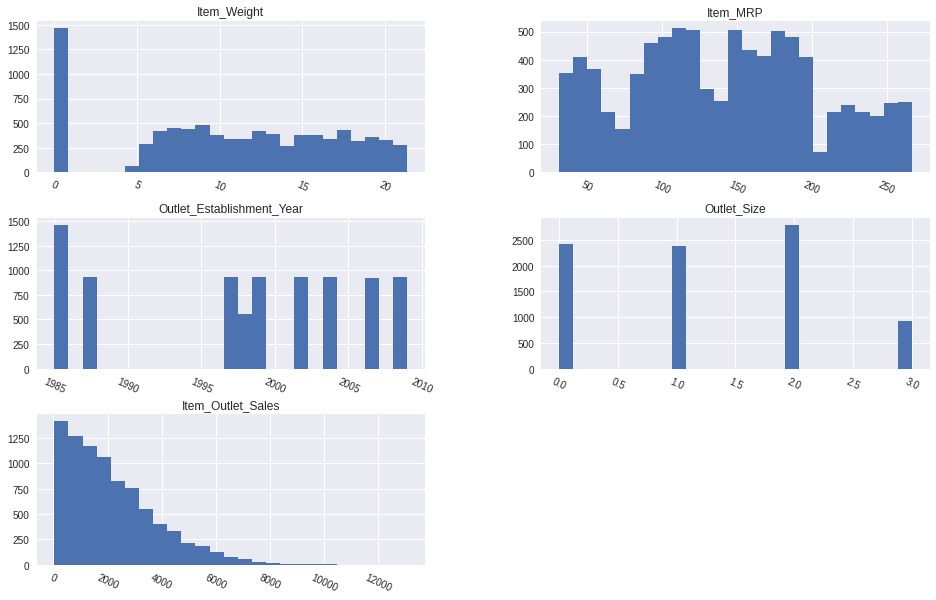

In [84]:
# This confirms that I will not use the Item_Weight initially as a column for my features.
# There are way too many zero'd figures to rely on this column to teach our model appropriately.
# Removing the rows with zeros at this point will impact this dataset too greatly so I may
# run another model with the rows containing zeros filtered out. It will just be a smaller dataset.

mod_sales.loc[:,:].hist(bins=25,
                 figsize=(16, 10),
                 xlabelsize='10',
                 ylabelsize='10', xrot=-25);

In [85]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [86]:
mod_sales['Item_Outlet_Sales'].max()

13086.9648

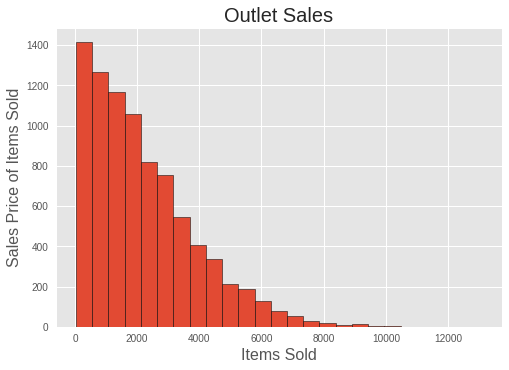

In [87]:
plt.style.use('ggplot')
mod_sales['Item_Outlet_Sales'].hist(bins=25, edgecolor='black')
plt.title('Outlet Sales', fontsize=20)
plt.xlabel('Items Sold', fontsize=16)
plt.ylabel('Sales Price of Items Sold', fontsize=16);

In [88]:
mod_sales['Item_Outlet_Sales'].count()

8523

In [89]:
print(mod_sales['Item_Outlet_Sales'].max())
print(mod_sales['Item_Outlet_Sales'].min())
print(mod_sales['Item_Outlet_Sales'].mean())
print(mod_sales['Item_Outlet_Sales'].sum())

13086.9648
33.29
2181.2889135750365
18591125.410399996


In [90]:
13086.9648/2

6543.4824

In [91]:
prices = mod_sales['Item_Outlet_Sales'] <= 6543.4824

In [92]:
mod_sales.loc[prices, 'Item_Outlet_Sales'].count()

8343

In [93]:
8343/8523

0.9788806758183738

In [94]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [95]:
# The Item_Fat_Content column can be considered ordinal

mod_sales['Item_Fat_Content'].replace({'Low Fat' : 0,
                                       'Regular' : 1}, inplace=True)

In [96]:
mod_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052


In [97]:
sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [98]:
sales['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [99]:
# The Outlet_Establishment_Year column is also ordinal

mod_sales['Outlet_Establishment_Year'].replace({1985 : 0,
                                            1987 : 1,
                                            1997 : 2,
                                            1998 : 3,
                                            1999 : 4,
                                            2002 : 5,
                                            2004 : 6,
                                            2007 : 7,
                                            2009 : 8}, inplace= True)

In [100]:
mod_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,Dairy,249.8092,OUT049,4,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,Soft Drinks,48.2692,OUT018,8,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,Meat,141.6180,OUT049,4,2,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,Fruits and Vegetables,182.0950,OUT010,3,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,Household,53.8614,OUT013,1,3,Tier 3,Supermarket Type1,994.7052


In [101]:
sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [102]:
# I am going to the values on the Outle_Type column and make those ordinal as well.
# They are pretty much alreay in order

mod_sales['Outlet_Type'].replace({'Grocery Store' : 0,
                              'Supermarket Type1' : 1,
                              'Supermarket Type2' : 2,
                              'Supermarket Type3' : 3}, inplace=True)

In [103]:
mod_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,Dairy,249.8092,OUT049,4,2,Tier 1,1,3735.1380
1,DRC01,5.92,1,Soft Drinks,48.2692,OUT018,8,2,Tier 3,2,443.4228
2,FDN15,17.50,0,Meat,141.6180,OUT049,4,2,Tier 1,1,2097.2700
3,FDX07,19.20,1,Fruits and Vegetables,182.0950,OUT010,3,0,Tier 3,0,732.3800
4,NCD19,8.93,0,Household,53.8614,OUT013,1,3,Tier 3,1,994.7052


In [104]:
sales['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [105]:
# Outlet_Location_Type is already nubered as well so I will also arrange this as ordinal

mod_sales['Outlet_Location_Type'].replace({'Tier 1' : 1,
                                           'Tier 2' : 2,
                                           'Tier 3' : 3}, inplace=True)

In [106]:
mod_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,Dairy,249.8092,OUT049,4,2,1,1,3735.1380
1,DRC01,5.92,1,Soft Drinks,48.2692,OUT018,8,2,3,2,443.4228
2,FDN15,17.50,0,Meat,141.6180,OUT049,4,2,1,1,2097.2700
3,FDX07,19.20,1,Fruits and Vegetables,182.0950,OUT010,3,0,3,0,732.3800
4,NCD19,8.93,0,Household,53.8614,OUT013,1,3,3,1,994.7052


In [107]:
# The last 2 columns I will change are the Item_Type and Outlet_Identifier. I will transform
# these based on nominal assigment as there isn't an obvious order. The Outlet_Identifier
# could be based on year established or some other factor to make it ordinal, but since I
# am changing the Item_Type column nominally I will include both columns at the same time.
# I am adapting code from this website: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

from sklearn.preprocessing import LabelEncoder

le_item = LabelEncoder()
item_labels = le_item.fit_transform(mod_sales['Item_Type'])
transform_item = {index: label for index, label in enumerate(le_item.classes_)}

transform_item


{0: 'Baking Goods',
 1: 'Breads',
 2: 'Breakfast',
 3: 'Canned',
 4: 'Dairy',
 5: 'Frozen Foods',
 6: 'Fruits and Vegetables',
 7: 'Hard Drinks',
 8: 'Health and Hygiene',
 9: 'Household',
 10: 'Meat',
 11: 'Others',
 12: 'Seafood',
 13: 'Snack Foods',
 14: 'Soft Drinks',
 15: 'Starchy Foods'}

In [108]:
# I guess these are a little more ordinal than I had expected. They have been alphabetized
# and chronologically numbered. I guess that's the 'enumerate' part.

le_OI = LabelEncoder()
OI_labels = le_OI.fit_transform(mod_sales['Outlet_Identifier'])
transform_OI = {index: label for index, label in enumerate(le_OI.classes_)}

transform_OI

{0: 'OUT010',
 1: 'OUT013',
 2: 'OUT017',
 3: 'OUT018',
 4: 'OUT019',
 5: 'OUT027',
 6: 'OUT035',
 7: 'OUT045',
 8: 'OUT046',
 9: 'OUT049'}

In [109]:
mod_sales.insert(4, 'transformed_Item_Type', item_labels)

In [110]:
mod_sales.insert(7, 'transformed_Outlet_Identifier', OI_labels)

In [111]:
mod_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,transformed_Item_Type,Item_MRP,Outlet_Identifier,transformed_Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,Dairy,4,249.8092,OUT049,9,4,2,1,1,3735.1380
1,DRC01,5.92,1,Soft Drinks,14,48.2692,OUT018,3,8,2,3,2,443.4228
2,FDN15,17.50,0,Meat,10,141.6180,OUT049,9,4,2,1,1,2097.2700
3,FDX07,19.20,1,Fruits and Vegetables,6,182.0950,OUT010,0,3,0,3,0,732.3800
4,NCD19,8.93,0,Household,9,53.8614,OUT013,1,1,3,3,1,994.7052


In [112]:
# Adding the one_hot encoding to the two columns that were numbered more ordianl than nominal

from sklearn.preprocessing import OneHotEncoder

In [113]:
ohe_item = OneHotEncoder()
item_feature_arr = ohe_item.fit_transform(mod_sales[['transformed_Item_Type']]).toarray()
item_feature_labels = list(le_item.classes_)
item_features = pd.DataFrame(item_feature_arr, columns= item_feature_labels)

ohe_OI = OneHotEncoder()
OI_feature_arr = ohe_OI.fit_transform(mod_sales[['transformed_Outlet_Identifier']]).toarray()
OI_feature_labels = ['Outlet_Identifier_' + str(cls_label) for cls_label in le_OI.classes_]
OI_features = pd.DataFrame(OI_feature_arr, columns= OI_feature_labels)

In [114]:
mod_sales_ohe = pd.concat([mod_sales, item_features, OI_features], axis=1)
columns = sum([['Item_Identifier', 'Item_Weight',	'Item_Fat_Content',	'Item_Type',
                'transformed_Item_Type'], item_feature_labels, ['Item_MRP', 'Outlet_Identifier',	
                                                                 'transformed_Outlet_Identifier'], 
               OI_feature_labels, ['Outlet_Establishment_Year',	'Outlet_Size',	'Outlet_Location_Type',	
                                   'Outlet_Type',	'Item_Outlet_Sales']], [])
mod_sales_ohe

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,transformed_Item_Type,Item_MRP,Outlet_Identifier,transformed_Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.300,0,Dairy,4,249.8092,OUT049,9,4,2,1,1,3735.1380,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,DRC01,5.920,1,Soft Drinks,14,48.2692,OUT018,3,8,2,3,2,443.4228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FDN15,17.500,0,Meat,10,141.6180,OUT049,9,4,2,1,1,2097.2700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,FDX07,19.200,1,Fruits and Vegetables,6,182.0950,OUT010,0,3,0,3,0,732.3800,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,8.930,0,Household,9,53.8614,OUT013,1,1,3,3,1,994.7052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,Snack Foods,13,214.5218,OUT013,1,1,3,3,1,2778.3834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8519,FDS36,8.380,1,Baking Goods,0,108.1570,OUT045,7,5,0,2,1,549.2850,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,NCJ29,10.600,0,Health and Hygiene,8,85.1224,OUT035,6,6,1,2,1,1193.1136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8521,FDN46,7.210,1,Snack Foods,13,103.1332,OUT018,3,8,2,3,2,1845.5976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# First feature matrix utilizing all data from dataset except columns that contain strings and
# wrongly ordered columns that then were broken into categories in a OneHot situation

ms_filter = mod_sales_ohe.loc[:, ['Item_Identifier', 'transformed_Item_Type', 'transformed_Outlet_Identifier', 'Item_Type', 'Outlet_Identifier', 'Item_Outlet_Sales']]
mod_sales_X = mod_sales_ohe.drop(columns = ms_filter)

mod_sales_X.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,249.8092,4,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.92,1,48.2692,8,2,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.50,0,141.6180,4,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,19.20,1,182.0950,3,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,0,53.8614,1,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
X = mod_sales_X.values
X.shape

(8523, 33)

In [117]:
#target vector

y = mod_sales.loc[:, 'Item_Outlet_Sales'].values
y.shape

(8523,)

In [118]:
reg = LinearRegression()

In [119]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
pred = reg.predict(X)
pred

array([4004.03125   ,  548.69140625, 2359.87109375, ..., 1521.4453125 ,
       1417.77734375, 1206.1875    ])

In [121]:
score = reg.score(X, y)

score

0.5636881077433815

In [122]:
np.sqrt(mean_squared_error(y, pred))

1127.1435774690665

In [123]:
sales.corr()

,Item_Weight,Item_Fat_Content,transformed_Item_Type,Item_MRP,transformed_Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.011943,0.019390,0.022859,0.004822,0.471542,-0.120341,-0.067122,-0.308917,-0.053222
Item_Fat_Content,-0.011943,1.000000,-0.139434,0.006063,0.000764,0.002447,0.001365,-0.001598,0.002199,0.018719
transformed_Item_Type,0.019390,-0.139434,1.000000,0.032651,0.001656,0.006527,-0.000827,0.003084,0.003053,0.017048
Item_MRP,0.022859,0.006063,0.032651,1.000000,0.003319,0.004162,0.002473,0.000232,-0.001975,0.567574
transformed_Outlet_Identifier,0.004822,0.000764,0.001656,0.003319,1.000000,-0.030969,-0.053224,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,0.471542,0.002447,0.006527,0.004162,-0.030969,1.000000,-0.360690,0.042005,-0.040040,-0.025525
Outlet_Size,-0.120341,0.001365,-0.000827,0.002473,-0.053224,-0.360690,1.000000,0.290216,0.432062,0.172477
Outlet_Location_Type,-0.067122,-0.001598,0.003084,0.000232,-0.716176,0.042005,0.290216,1.000000,0.467219,0.089367
Outlet_Type,-0.308917,0.002199,0.003053,-0.001975,0.099873,-0.040040,0.432062,0.467219,1.000000,0.401522
Item_Outlet_Sales,-0.053222,0.018719,0.017048,0.567574,0.162325,-0.025525,0.172477,0.089367,0.401522,1.000000





>  Removing zero from the Item_Weight column






In [124]:
weight_filter = mod_sales_ohe.loc[:, 'Item_Weight'] <= 0
mod_sales_weight_filter = mod_sales_X.loc[~weight_filter, :]

In [125]:
# Second and Third Atempt... feature matrix - removing the zero I imputed in the Item_Weight column
# during EDA (nothing weighs 0.000. I imputed to preserve the as much data as possible)

mod_sales_X_2nd = mod_sales_weight_filter.loc[:, ['Item_Weight', 'Item_MRP', 'Outlet_Size', 'Outlet_Establishment_Year', 'Outlet_Type', 'Outlet_Location_Type']]
mod_sales_X_3rd = mod_sales_weight_filter

In [126]:
# With the second attempt I am randomly choosing columns I think will contribute to the model

mod_sales_X_2nd.head()

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Establishment_Year,Outlet_Type,Outlet_Location_Type
0,9.30,249.8092,2,4,1,1
1,5.92,48.2692,2,8,2,3
2,17.50,141.6180,2,4,1,1
3,19.20,182.0950,0,3,0,3
4,8.93,53.8614,3,1,1,3


In [127]:
# With the third attempt I am choosing all columns, but I've still removed the zero values I
# imputed during EDA

mod_sales_X_3rd.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,249.8092,4,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.92,1,48.2692,8,2,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.50,0,141.6180,4,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,19.20,1,182.0950,3,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,0,53.8614,1,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
X2 = mod_sales_X_2nd.values
X2.shape

(7060, 6)

In [129]:
#target vector

y2 = mod_sales_ohe.loc[~weight_filter, 'Item_Outlet_Sales'].values
y2.shape

(7060,)

In [130]:
reg2 = LinearRegression(fit_intercept=True)

In [131]:
reg2.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
p2 = reg2.predict(X2)
p2

array([4230.4893468 ,  987.77867213, 2574.18482421, ..., 1240.21603973,
       1822.94685296, 1487.29725482])

In [133]:
# Muvh Worse!

reg2.score(X2,y2)

0.4526393313239391

In [134]:
np.sqrt(mean_squared_error(y2, p2))

1134.4215715365553

In [135]:
# testing with the weight filter and ALL the columns

X3 = mod_sales_X_3rd.values
X3.shape 

(7060, 33)

In [136]:
y3 = mod_sales_ohe.loc[~weight_filter, 'Item_Outlet_Sales'].values
y3.shape

(7060,)

In [137]:
reg3 = reg2
reg3.fit(X3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
p3 = reg3.predict(X3)
p3

array([3950.12596657,  596.9276011 , 2325.76382262, ..., 1548.24380045,
       1442.04406828, 1236.09977952])

In [139]:
# Also Worse!

reg3.score(X3,y3)

0.507408550458427

In [140]:
#This is the lowest so far, but stil seems high

np.sqrt(mean_squared_error(y3, p3))

1076.1705843921097



> Trying only columns that correlate well with the sales column and I combine all the transformed categorical columns as well.


In [141]:
# Am I supposed to get rid of a row from my OneHot stuff?

mod_sales_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   object 
 1   Item_Weight                    8523 non-null   float64
 2   Item_Fat_Content               8523 non-null   int64  
 3   Item_Type                      8523 non-null   object 
 4   transformed_Item_Type          8523 non-null   int64  
 5   Item_MRP                       8523 non-null   float64
 6   Outlet_Identifier              8523 non-null   object 
 7   transformed_Outlet_Identifier  8523 non-null   int64  
 8   Outlet_Establishment_Year      8523 non-null   int64  
 9   Outlet_Size                    8523 non-null   int64  
 10  Outlet_Location_Type           8523 non-null   int64  
 11  Outlet_Type                    8523 non-null   int64  
 12  Item_Outlet_Sales              8523 non-null   f

In [142]:
mod_sales_ohe.corr()

,Item_Weight,Item_Fat_Content,transformed_Item_Type,Item_MRP,transformed_Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
Item_Weight,1.000000,-0.011943,0.019390,0.022859,0.004822,0.471542,-0.120341,-0.067122,-0.308917,-0.053222,-0.022098,-0.038687,-0.005688,-0.019221,0.022555,0.007383,0.018392,-0.022500,0.008604,0.027586,-0.017354,0.012817,-0.008758,0.002692,-0.025304,0.028421,0.092845,0.128333,0.118126,0.120806,-0.425567,-0.581302,0.118558,0.108732,0.120596,0.123352
Item_Fat_Content,-0.011943,1.000000,-0.139434,0.006063,0.000764,0.002447,0.001365,-0.001598,0.002199,0.018719,0.083804,0.032643,0.065711,0.073235,0.021236,0.085041,0.116955,-0.118461,-0.188156,-0.255203,0.118574,-0.104988,0.012594,0.059848,-0.094875,0.025945,0.000254,-0.002132,0.004266,0.002129,-0.004300,0.000183,-0.003154,-0.006029,0.003147,0.004722
transformed_Item_Type,0.019390,-0.139434,1.000000,0.032651,0.001656,0.006527,-0.000827,0.003084,0.003053,0.017048,-0.492431,-0.257651,-0.141968,-0.288249,-0.226051,-0.176737,-0.119781,-0.008642,0.046825,0.145638,0.150921,0.127486,0.098627,0.555157,0.377637,0.245465,0.000474,-0.003507,0.001083,-0.000659,-0.005167,0.002413,0.008062,0.001647,-0.011157,0.005738
Item_MRP,0.022859,0.006063,0.032651,1.000000,0.003319,0.004162,0.002473,0.000232,-0.001975,0.567574,-0.067311,-0.000112,0.001460,-0.005666,0.035551,-0.013358,0.023688,-0.010089,-0.041646,0.046815,-0.004086,-0.018595,0.001186,0.033817,-0.035808,0.014613,-0.000912,0.002438,-0.008812,0.003850,-0.004976,-0.006714,0.011969,-0.000239,0.005983,-0.003906
transformed_Outlet_Identifier,0.004822,0.000764,0.001656,0.003319,1.000000,-0.030969,-0.053224,-0.716176,0.099873,0.162325,-0.003127,0.005310,-0.008959,0.008613,-0.001158,-0.000175,0.000018,0.007251,-0.013406,-0.004322,-0.006264,0.005320,0.007078,0.009187,-0.001936,-0.002500,-0.439298,-0.459730,-0.335006,-0.212202,-0.065426,0.034362,0.157618,0.280807,0.404335,0.527694
Outlet_Establishment_Year,0.471542,0.002447,0.006527,0.004162,-0.030969,1.000000,-0.360690,0.042005,-0.040040,-0.025525,-0.004599,-0.003676,-0.005702,0.011803,-0.005583,0.004600,-0.003559,0.005986,-0.002362,-0.003830,-0.013434,-0.004509,-0.000798,0.005212,0.007562,0.012824,-0.076434,-0.358163,0.410401,0.538931,-0.356810,-0.487384,0.283207,0.154926,-0.229544,0.026832
Outlet_Size,-0.120341,0.001365,-0.000827,0.002473,-0.053224,-0.360690,1.000000,0.290216,0.432062,0.172477,-0.003061,-0.003630,0.002102,-0.000940,0.005333,-0.003424,0.007825,-0.001076,0.000945,-0.002271,0.001609,-0.005577,-0.005322,0.003285,-0.008169,0.003615,-0.337167,0.615103,-0.446023,0.260226,-0.068496,0.261326,-0.093281,-0.446833,-0.093281,0.260540
Outlet_Location_Type,-0.067122,-0.001598,0.003084,0.000232,-0.716176,0.042005,0.290216,1.000000,0.467219,0.089367,-0.003345,0.003987,-0.000532,-0.000138,-0.010098,-0.009422,0.008188,0.001703,0.011645,0.005277,0.003999,-0.014576,-0.005391,-0.001845,-0.001446,0.006957,0.288087,0.382481,-0.048488,0.381559,-0.351898,0.383172,-0.048605,-0.048576,-0.479230,-0.479230
Outlet_Type,-0.308917,0.002199,0.003053,-0.001975,0.099873,-0.040040,0.432062,0.467219,1.000000,0.401522,-0.005220,0.004787,-0.009312,0.010225,-0.012072,-0.002571,0.006325,0.000884,0.003918,-0.004346,0.004387,-0.011631,-0.003205,0.007851,-0.004995,0.002503,-0.398067,-0.088530,-0.088210,0.350590,-0.387608,0.792834,-0.088424,-0.088370,-0.088424,-0.088424
Item_Outlet_Sales,-0.053222,0.018719,0.017048,0.567574,0.162325,-0.025525,0.172477,0.089367,0.401522,1.000000,-0.038381,0.002332,-0.004656,0.007387,0.008858,-0.009482,

In [143]:
# 4th Atempt... feature matrix - choosing columns with higher correlationbut preserving all the
# OneHot columns

ms_filter2 = mod_sales_ohe.loc[:, ['Item_Identifier', 'Item_Weight', 'transformed_Item_Type', 'transformed_Outlet_Identifier',
                                   'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Item_Outlet_Sales']]
mod_sales_X_4th = mod_sales_ohe.drop(columns = ms_filter2)

mod_sales_X_4th.head()

,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,249.8092,4,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,48.2692,8,2,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,141.6180,4,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,182.0950,3,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.8614,1,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
X4 = mod_sales_X_4th.values
X4.shape 

(8523, 31)

In [145]:
y4 = mod_sales_ohe.loc[:, 'Item_Outlet_Sales'].values
y4.shape

(8523,)

In [146]:
reg4 = LinearRegression()
reg4.fit(X4,y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
pred4 = reg4.predict(X4)
pred4

array([4017.72063024,  512.40779177, 2386.04998159, ..., 1520.04153142,
       1392.15728672, 1214.04898021])

In [148]:
# Ummm, I think this is the same as my first attempt which didn't have columns pulled out.
# this is 100th of  a percentage that the first attempt.

reg4.score(X4,y4)

0.5635845155616708

In [149]:
# Slightly less

np.sqrt(mean_squared_error(y4, pred4))

1127.277376632579



> I'm going to run this model only with the columns that correlate well


In [150]:
# Fifth Attempt... Feature matrix - I will strictly run columns that correlate well with 
# the sales column.

mod_sales_X_5th = mod_sales.loc[:, ['Item_MRP', 'Outlet_Size', 'Outlet_Type']]

mod_sales_X_5th.head()

,Item_MRP,Outlet_Size,Outlet_Type
0,249.8092,2,1
1,48.2692,2,2
2,141.6180,2,1
3,182.0950,0,0
4,53.8614,3,1


In [151]:
X5 = mod_sales_X_5th.values
y5 = mod_sales_ohe.loc[:, 'Item_Outlet_Sales'].values
reg5 = LinearRegression()
reg5.fit(X5, y5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
X5.shape

(8523, 3)

In [153]:
pred5 = reg5.predict(X5)
pred5

array([3697.33796343, 1424.3314988 , 2012.2454084 , ..., 1138.46169983,
       2278.84571012,  988.07754052])

In [154]:
# Much Worse... The model needs more data to be more accurate

reg5.score(X5,y5)

0.4842732779418643

In [155]:
# This is higher. This direction is not helping

np.sqrt(mean_squared_error(y5, pred5))

1225.4357130173285



> Just curious if I add a couple of the columns from the OneHot classifications if it will change the results any. A couple of the Outlets in the Outlet Identifier columns had a higher correlation with the sales column. I believe this means that those sales might conduct higher sales valume or they carry specific items that people specifcally go there to purchase. It's also possible these outlets are located in a more prime area than the other locations that correlate as well.



In [156]:
# Sixth Attempt... I will use the same columns as attempt 5, but I will add the column for
# Outlet 027

mod_sales_X_6th = mod_sales_ohe.loc[:, ['Item_MRP', 'Outlet_Size', 'Outlet_Type', 'Outlet_Identifier_OUT027']]

mod_sales_X_6th.head()

,Item_MRP,Outlet_Size,Outlet_Type,Outlet_Identifier_OUT027
0,249.8092,2,1,0.0
1,48.2692,2,2,0.0
2,141.6180,2,1,0.0
3,182.0950,0,0,0.0
4,53.8614,3,1,0.0


In [157]:
X6 = mod_sales_X_6th.values
y6 = mod_sales_ohe.loc[:, 'Item_Outlet_Sales'].values
reg6 = LinearRegression()
reg6.fit(X6, y6)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
pred6 = reg6.predict(X6)
pred6

array([3698.54726404, 1448.11567406, 2013.63203296, ..., 1142.0802381 ,
       2302.539964  ,  991.71190387])

In [159]:
# A very small improvement. Almost unnoticeable

reg6.score(X6,y6)

0.4843293085832434

In [160]:
np.sqrt(mean_squared_error(y6, pred6))

1225.3691430578308



> Final Attempt ... I will run the model from the sixth attempt but add in a couple specific Outlets with a negative correlation. The numbers were higher so maybe the effect on the prediction model will help.



In [161]:
mod_sales_X_7th = mod_sales_ohe.loc[:, ['Item_MRP', 'Outlet_Size', 'Outlet_Type', 'Outlet_Identifier_OUT027',
                                        'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT010']]

mod_sales_X_7th.head()

,Item_MRP,Outlet_Size,Outlet_Type,Outlet_Identifier_OUT027,Outlet_Identifier_OUT019,Outlet_Identifier_OUT010
0,249.8092,2,1,0.0,0.0,0.0
1,48.2692,2,2,0.0,0.0,0.0
2,141.6180,2,1,0.0,0.0,0.0
3,182.0950,0,0,0.0,0.0,1.0
4,53.8614,3,1,0.0,0.0,0.0


In [162]:
X7 = mod_sales_X_7th.values
y7 = mod_sales_ohe.loc[:, 'Item_Outlet_Sales'].values
reg7 = LinearRegression()
reg7.fit(X7, y7)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
pred7 = reg7.predict(X7)
pred7

array([4014.92009318,  541.92769462, 2331.32574109, ..., 1441.53228735,
       1395.68216386, 1291.28183346])

In [164]:
# Definitely better, but still not as good as using all the columns.
reg7.score(X7,y7)

0.5620792543807296

In [165]:
np.sqrt(mean_squared_error(y7, pred7))

1129.2197758885277



> I believe I was supposed to delete a column for both of the OneHot columns I converted. I've seen there are other ways to splice and randomize the dataset in order to teach the model to be predict more accurately.





# Part 6

In [166]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [167]:
mod_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,transformed_Item_Type,Item_MRP,Outlet_Identifier,transformed_Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,Dairy,4,249.8092,OUT049,9,4,2,1,1,3735.1380
1,DRC01,5.92,1,Soft Drinks,14,48.2692,OUT018,3,8,2,3,2,443.4228
2,FDN15,17.50,0,Meat,10,141.6180,OUT049,9,4,2,1,1,2097.2700
3,FDX07,19.20,1,Fruits and Vegetables,6,182.0950,OUT010,0,3,0,3,0,732.3800
4,NCD19,8.93,0,Household,9,53.8614,OUT013,1,1,3,3,1,994.7052


In [168]:
mod_sales['Item_Identifier'].nunique

<bound method IndexOpsMixin.nunique of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

In [169]:
# found this code on: https://github.com/SulaimanShaik/Big_mart-Sales-Analytics/blob/master/Bigmarket_sale_prediction%20Analytics%20Vidhya.ipynb
# this will help make the Identifier column not useless... Might show something
#    about which types of food sell more for which Outlets

#Get the first two characters of ID:
mod_sales['Item_Type_Combined'] = mod_sales['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
mod_sales['Item_Type_Combined'] = mod_sales['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable','DR':'Drinks'})
mod_sales['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

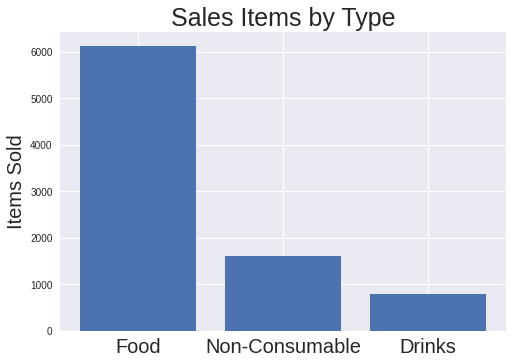

In [170]:
plt.style.use('seaborn')
plt.bar(mod_sales['Item_Type_Combined'].value_counts().index, mod_sales['Item_Type_Combined'].value_counts().values);
plt.title('Sales Items by Type', fontsize=25)
plt.ylabel('Items Sold', fontsize=20)
plt.xticks(fontsize=20);

In [171]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                         'NC':'Non-Consumable',
                                                         'DR':'Drinks'})                                                      

In [172]:
food = df['Item_Type_Combined'] == 'Food'
nonc = df['Item_Type_Combined'] == 'Non-Consumable'
drinks = df['Item_Type_Combined'] == 'Drinks'

food_sales = df.loc[food, 'Item_Outlet_Sales']

In [173]:
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [174]:
print('Food = ' + str(round(6125/(food.count()),2)))
print('Non-Consumables = ' + str(round(1599/(food.count()),2)))
print('Beverages = ' + str(round(799/(food.count()),2)))

Food = 0.72
Non-Consumables = 0.19
Beverages = 0.09


In [175]:
foodSold = df[food].groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
ncSold = df[nonc].groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
drinksSold = df[drinks].groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
foodSold

Outlet_Identifier
OUT010    1.295594e+05
OUT013    1.547201e+06
OUT017    1.576697e+06
OUT018    1.349399e+06
OUT019    1.319469e+05
OUT027    2.575792e+06
OUT035    1.654342e+06
OUT045    1.471357e+06
OUT046    1.559509e+06
OUT049    1.573241e+06
Name: Item_Outlet_Sales, dtype: float64

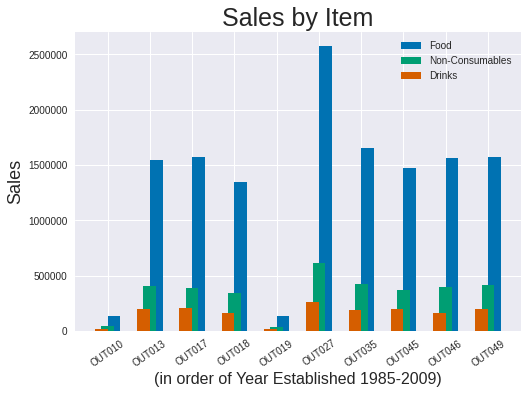

In [176]:

plt.style.use('seaborn-colorblind')
plt.bar(foodSold.index, foodSold.values, data=df, width=.3, align='edge', label='Food')
plt.bar(ncSold.index, ncSold.values, width=.3, align='center', label='Non-Consumables')
plt.bar(drinksSold.index, drinksSold.values, width = -.3, align='edge', label='Drinks')
plt.xticks(rotation= 35);
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales by Item', fontsize=25)
plt.xlabel('Outlet Identifier', fontsize = 15)
plt.xlabel('(in order of Year Established 1985-2009)', fontsize = 16)
plt.ylabel('Sales', fontsize = 18);
plt.legend(facecolor='gray', fontsize='medium');

In [177]:
out027 = df['Outlet_Identifier'] == 'OUT019'
df[out027].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,Food
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,Food
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176,Food
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720,Food
63,FDY40,NaN,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076,Food


In [178]:
consumables = sales['Item_Type_Combined'] != 'Non-Consumable'

In [210]:
conSales = sales[consumables].groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()
conSales

Item_Fat_Content
0    8.477883e+06
1    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

In [230]:
8.477883e+06/15164914.0

0.5590459002932691

In [232]:
consumablesFC = sales.loc[consumables, 'Item_Fat_Content']
consumablesFC.value_counts()

0    3918
1    3006
Name: Item_Fat_Content, dtype: int64

In [233]:
3918/6924

0.5658578856152513

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

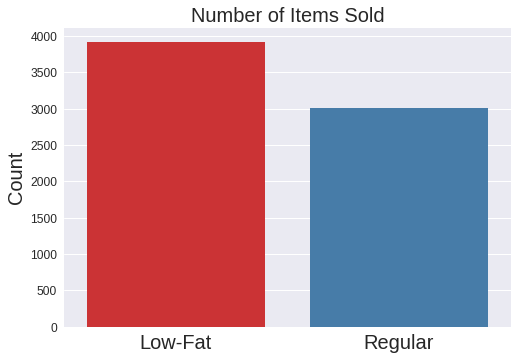

In [227]:
sns.countplot(consumablesFC, palette= 'Set1')
plt.xticks([0,1], ['Low-Fat', 'Regular'], fontsize=15);
plt.title('Number of Items Sold', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlabel(None)
plt.yticks(fontsize=12)
plt.xticks(fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


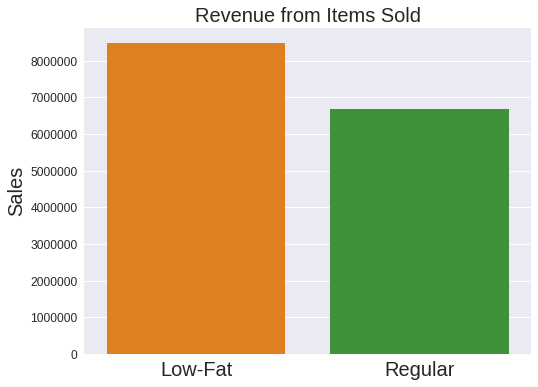

In [228]:
from matplotlib.ticker import ScalarFormatter

fig, axs = plt.subplots(figsize=(8, 6))
sns.barplot(conSales.index, conSales.values, palette= 'Paired_r');
plt.xticks([0,1], ['Low-Fat', 'Regular'], fontsize=15);
axs.yaxis.set_major_formatter(ScalarFormatter(useOffset=True))
axs.ticklabel_format(style='plain', axis='y')
plt.title('Revenue from Items Sold', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.xlabel(None)
plt.yticks(fontsize=12)
plt.xticks(fontsize=20);

In [183]:
X = mod_sales_X
y = mod_sales.loc[:, 'Item_Outlet_Sales']

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(
    n_estimators = 500,
    learning_rate = .03,
    n_iter_no_change = 10,
    validation_fraction =0.2,
    verbose = 1,
    random_state=42)

In [186]:
gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1     2846290.3317            4.46s
         2     2759672.3494            4.19s
         3     2678173.4460            4.04s
         4     2601694.0708            3.97s
         5     2529187.1423            3.98s
         6     2461199.2366            4.11s
         7     2396596.7129            4.05s
         8     2335753.6306            4.01s
         9     2277471.3301            3.97s
        10     2223088.9786            3.94s
        20     1811056.0336            3.59s
        30     1562861.6985            3.78s
        40     1410639.4228            3.66s
        50     1316954.1580            3.53s
        60     1258466.2315            3.41s
        70     1220459.6359            3.35s
        80     1195205.1208            3.25s
        90     1177858.3353            3.15s
       100     1165442.8886            3.06s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=10, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.2, verbose=1, warm_start=False)

In [187]:
len(gbm.train_score_)

194

In [188]:
gbm = GradientBoostingRegressor(
    n_estimators = 184,
    learning_rate = .03,
    n_iter_no_change = 10)

In [189]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

0.59676528090671

In [190]:
gbm.score(X_train, y_train), gbm.score(X_val, y_val)

(0.6042703241566916, 0.59676528090671)

In [191]:
mod_sales['prediction'] = gbm.predict(X)

In [192]:
gbm.feature_importances_

array([1.56388906e-02, 2.08581256e-06, 5.35472945e-01, 2.41903074e-02,
       5.95183541e-04, 0.00000000e+00, 3.75753081e-01, 0.00000000e+00,
       0.00000000e+00, 2.32477180e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.34156796e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.01251609e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.08290072e-03, 8.15535569e-05, 0.00000000e+00,
       2.69589653e-04, 0.00000000e+00, 1.17521080e-03, 0.00000000e+00,
       4.40552395e-02, 9.88416255e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [193]:
feats = pd.DataFrame({'Column' : X.columns,
                      'Importance' : gbm.feature_importances_}).sort_values(by= 'Importance', ascending=False)

In [194]:
feats

,Column,Importance
2,Item_MRP,0.535473
6,Outlet_Type,0.375753
28,Outlet_Identifier_OUT027,0.044055
3,Outlet_Establishment_Year,0.024190
0,Item_Weight,0.015639
13,Fruits and Vegetables,0.001342
26,Outlet_Identifier_OUT018,0.001175
21,Soft Drinks,0.001083
4,Outlet_Size,0.000595
24,Outlet_Identifier_OUT013,0.000270


In [195]:
X = mod_sales_X.loc[:, ['Item_MRP','Outlet_Type','Outlet_Identifier_OUT027', 'Outlet_Establishment_Year']]

y = mod_sales.loc[:, 'Item_Outlet_Sales']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [197]:
gbm = GradientBoostingRegressor(
    n_estimators = 500,
    learning_rate = .05,
    n_iter_no_change = 10,
    validation_fraction =0.2,
    verbose = 1,
    random_state=42)

In [198]:
gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1     2797690.8100            3.20s
         2     2662168.2902            2.76s
         3     2536592.3424            2.51s
         4     2423239.9412            2.36s
         5     2319786.2072            2.30s
         6     2227192.8324            2.24s
         7     2142782.8554            2.19s
         8     2063536.9057            2.16s
         9     1990390.4280            2.15s
        10     1924304.1667            2.17s
        20     1499056.1856            1.91s
        30     1311360.3115            1.85s
        40     1225591.5797            1.74s
        50     1182587.6508            1.65s
        60     1159639.2524            1.61s
        70     1146007.4410            1.57s
        80     1136095.6164            1.54s
        90     1128634.3743            1.50s
       100     1123228.8313            1.50s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=10, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.2, verbose=1, warm_start=False)

In [199]:
len(gbm.train_score_)

144

In [200]:
gbm = GradientBoostingRegressor(
    n_estimators = 85,
    learning_rate = .4,
    n_iter_no_change = 10)

In [201]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

0.5822916729670164

In [202]:
gbm.score(X_train, y_train), gbm.score(X_val, y_val)

(0.6208292196473537, 0.5822916729670164)

In [203]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [204]:
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.5915888541628109

In [205]:
mod_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,transformed_Item_Type,Item_MRP,Outlet_Identifier,transformed_Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,prediction
0,FDA15,9.30,0,Dairy,4,249.8092,OUT049,9,4,2,1,1,3735.1380,Food,3756.434801
1,DRC01,5.92,1,Soft Drinks,14,48.2692,OUT018,3,8,2,3,2,443.4228,Drinks,833.844885
2,FDN15,17.50,0,Meat,10,141.6180,OUT049,9,4,2,1,1,2097.2700,Food,2225.467359
3,FDX07,19.20,1,Fruits and Vegetables,6,182.0950,OUT010,0,3,0,3,0,732.3800,Food,623.710845
4,NCD19,8.93,0,Household,9,53.8614,OUT013,1,1,3,3,1,994.7052,Non-Consumable,1011.312396


In [206]:
food = mod_sales['Item_Type_Combined'] == 'Food'
nonc =  mod_sales['Item_Type_Combined'] == 'Non-Consumable'
drinks = mod_sales['Item_Type_Combined'] == 'Drinks'

food_sales = mod_sales.loc[food, 'prediction']

In [207]:
foodpred = mod_sales[food].groupby(['Outlet_Identifier'])['prediction'].sum()
ncpred = mod_sales[nonc].groupby(['Outlet_Identifier'])['prediction'].sum()
drinkspred = mod_sales[drinks].groupby(['Outlet_Identifier'])['prediction'].sum()
foodpred

Outlet_Identifier
OUT010    2.011830e+05
OUT013    1.540980e+06
OUT017    1.501482e+06
OUT018    1.494871e+06
OUT019    1.909087e+05
OUT027    2.460453e+06
OUT035    1.570755e+06
OUT045    1.536493e+06
OUT046    1.540465e+06
OUT049    1.552017e+06
Name: prediction, dtype: float64

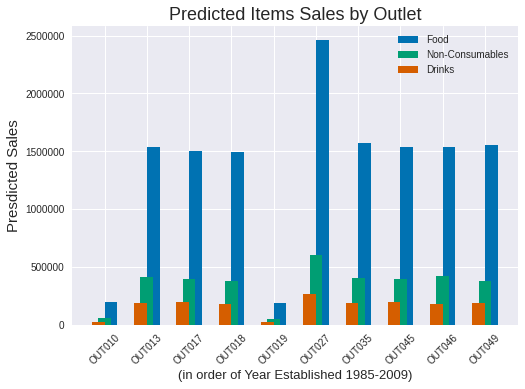

In [208]:
plt.style.use('seaborn-colorblind')
plt.bar(foodpred.index, foodpred.values, data=df, width=.3, align='edge', label='Food')
plt.bar(ncpred.index, ncpred.values, width=.3, align='center', label='Non-Consumables')
plt.bar(drinkspred.index, drinkspred.values, width = -.3, align='edge', label='Drinks')
plt.xticks(rotation= 45);
plt.ticklabel_format(style='plain', axis='y')
plt.title('Predicted Items Sales by Outlet', fontsize = 18)
plt.xlabel('Outlet Identifier', fontsize = 15)
plt.xlabel('(in order of Year Established 1985-2009)', fontsize = 13)
plt.ylabel('Presdicted Sales', fontsize = 15);
plt.legend(facecolor='gray', fontsize='medium');